In [1]:
import pandas as pd

df = pd.read_csv('data(100).csv')

print(df.to_string())

    orderID  gender                location   latitude  longitude
0         1    male            reddy colony  18.007632  79.569859
1         2    male            balasamudram  18.002799  79.558551
2         3  female           nakkala gutta  18.003014  79.553271
3         4    male               madikonda  17.964662  79.488721
4         5  female            kakaji nagar  18.006064  79.568164
5         6  female            gandhi nagar  18.008839  79.569709
6         7  female        KLN reddy colony  17.996268  79.544303
7         8    male          revenue colony  17.990228  79.542586
8         9    male                subedari  17.996758  79.548595
9        10  female           brahmana vada  18.003452  79.575717
10       11    male             gopalapuram  18.022389  79.534003
11       12    male               kumapalli  18.015731  79.567132
12       13  female            reddy colony  18.010457  79.568518
13       14  female            NGO's colony  18.005184  79.537029
14       1

In [3]:
df2 = df.drop(['location'],axis=1)
df3=df2.drop(['orderID'],axis=1)
df3=df3.drop(['gender'],axis=1)
df3

,latitude,longitude
0,18.007632,79.569859
1,18.002799,79.558551
2,18.003014,79.553271
3,17.964662,79.488721
4,18.006064,79.568164
...,...,...
95,17.975239,79.506469
96,17.974467,79.516018
97,17.958775,79.518296
98,17.990636,79.505239


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


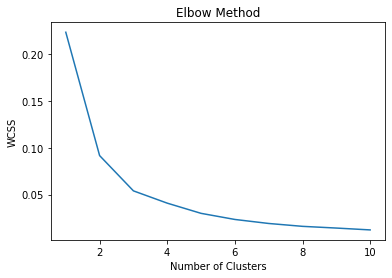

In [18]:
import matplotlib.pyplot as plt

# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(df3)
  wcss.append(kmeans_model.inertia_)
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [2]:
#!pip install folium
import pandas as pd
import folium
from sklearn.cluster import KMeans

# Load GPS coordinates from a CSV file
data = pd.read_csv('data(100).csv', usecols=['latitude', 'longitude'])

# Define the number of clusters
k = 3

# Create a k-means clustering object and fit the data
kmeans = KMeans(n_clusters=k).fit(data)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Create a map centered on the mean of the GPS coordinates
center_lat = data['latitude'].mean()
center_long = data['longitude'].mean()
map = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Add markers for each GPS coordinate
for index, row in data.iterrows():
    lat = row['latitude']
    long = row['longitude']
    cluster = row['Cluster']
    marker = folium.Marker(location=[lat, long], icon=None)
    marker.add_to(map)

# Add colored markers for each cluster center
colors = ['red', 'green', 'blue', 'purple']
for i in range(k):
    center_lat = kmeans.cluster_centers_[i][0]
    center_long = kmeans.cluster_centers_[i][1]
    marker = folium.Marker(location=[center_lat, center_long], icon=folium.Icon(color=colors[i]))
    marker.add_to(map)

# Display the map
map


kmeans.cluster_centers_

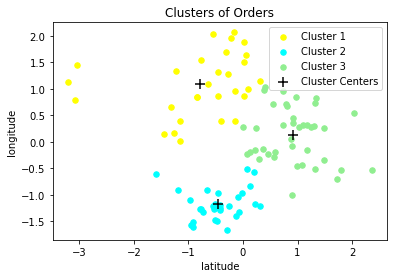

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df3)
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of Orders')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

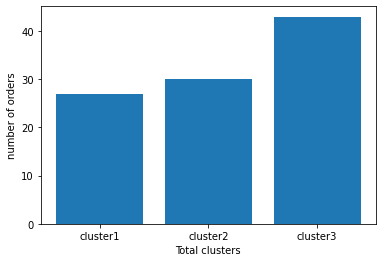

In [22]:
l=list(data['Cluster'])
x=['cluster1','cluster2','cluster3']
y=[l.count(0),l.count(1),l.count(2)]
plt.xlabel('Total clusters')
plt.ylabel('number of orders')
plt.bar(x,y)
plt.show()

In [17]:
x=pd.DataFrame(kmeans.labels_)
x=list(x[0])
x.count(1)

43

In [23]:
df['labels']=kmeans.labels_
print(df.to_string())

    orderID  gender                location   latitude  longitude  labels
0         1    male            reddy colony  18.007632  79.569859       2
1         2    male            balasamudram  18.002799  79.558551       2
2         3  female           nakkala gutta  18.003014  79.553271       2
3         4    male               madikonda  17.964662  79.488721       1
4         5  female            kakaji nagar  18.006064  79.568164       2
5         6  female            gandhi nagar  18.008839  79.569709       2
6         7  female        KLN reddy colony  17.996268  79.544303       2
7         8    male          revenue colony  17.990228  79.542586       2
8         9    male                subedari  17.996758  79.548595       2
9        10  female           brahmana vada  18.003452  79.575717       2
10       11    male             gopalapuram  18.022389  79.534003       2
11       12    male               kumapalli  18.015731  79.567132       2
12       13  female            reddy c

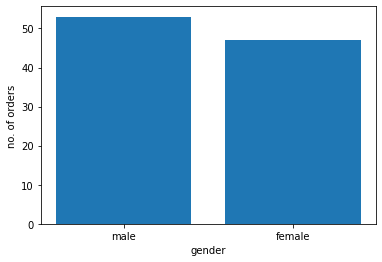

In [28]:
l=list(df['gender'])
x=['male','female']
y=[l.count('male'),l.count('female')]
plt.xlabel('gender')
plt.ylabel('no. of orders')
plt.bar(x,y)
plt.show()

In [24]:
#!pip install geopy
"""
This program imports the Nominatim geocoder from the Geopy library and
defines a function get_address() that takes latitude and longitude as arguments, 
uses the geocoder to reverse geocode the location, and returns the full address. 
The reverse() method of the geolocator object takes a string in the format "latitude,
longitude" as input and returns a location object that contains various attributes of the location, 
including the full address.

"""

from geopy.geocoders import Nominatim

def get_address(lat, lon):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

address = get_address(latitude, longitude)
print(f"Address: {address}")


Enter latitude: 17.97102807
Enter longitude: 79.6084427
Address: Khila Warangal mandal, Hanumakonda, Telangana, 506002, India


In [12]:
from geopy.geocoders import Nominatim

def get_address(lat, lon):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

address = get_address(latitude, longitude)
print(f"Address: {address}")


Enter latitude: 17.974581
Enter longitude: 79.50506603
Address: Kazipet, Khaazipet mandal, Hanumakonda, Telangana, 506003, India


In [13]:
from geopy.geocoders import Nominatim

def get_address(lat, lon):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

address = get_address(latitude, longitude)
print(f"Address: {address}")


Enter latitude: 17.99904153
Enter longitude: 79.55949135
Address: Laxmipuram, Nakkala Gutta, Hanamkonda, Hanamkonda mandal, Hanumakonda, Telangana, 506001, India


In [31]:
from geopy.geocoders import Nominatim

def get_address(lat, lon):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

address = get_address(latitude, longitude)
print(f"Address: {address}")


Enter latitude: 17.977890
Enter longitude: 79.598606
Address: Kotak mahindra bank, Jayaprakash Narayan Road, Warangal, Warangal mandal, Hanumakonda, Telangana, 506002, India
